### Problem Statement:
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

##### Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
- A single cell estimate of the population 16+ for each state.
- Controls for Hispanic Origin by age and sex.
- Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [3]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading Dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
data_tabel=[]

for i in df.columns:
    data_tabel.append([i,df[i].nunique(),df[i].drop_duplicates().values])

In [6]:
pd.DataFrame(data_tabel,columns=['Features','Unique_Number','Values'])

,Features,Unique_Number,Values
0,Age,73,"[50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 3..."
1,Workclass,9,"[ Self-emp-not-inc, Private, State-gov, Fed..."
2,Fnlwgt,21647,"[83311, 215646, 234721, 338409, 284582, 160187..."
3,Education,16,"[ Bachelors, HS-grad, 11th, Masters, 9th, ..."
4,Education_num,16,"[13, 9, 7, 14, 5, 10, 12, 11, 4, 16, 15, 3, 6,..."
5,Marital_status,7,"[ Married-civ-spouse, Divorced, Married-spou..."
6,Occupation,15,"[ Exec-managerial, Handlers-cleaners, Prof-s..."
7,Relationship,6,"[ Husband, Not-in-family, Wife, Own-child, ..."
8,Race,5,"[ White, Black, Asian-Pac-Islander, Amer-In..."
9,Sex,2,"[ Male, Female]"


In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We've no null values in our dataset.

In [8]:
#Checking for duplicate values
df.duplicated().sum()

24

We've 24 duplicate records.

In [9]:
#Displayin all the duplicate rows
df.drop_duplicates()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
numeric_features=[features for features in df.columns if df[features].dtype!='O']
print('Length Of Numeric_Features',len(numeric_features))
numeric_features

Length Of Numeric_Features 6


['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [11]:
categorical_features=[features for features in df.columns if df[features].dtype=='O']
print('Length Of Categorical_features',len(categorical_features))
categorical_features

Length Of Categorical_features 9


['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [12]:
discreat_features=[features for features in numeric_features if len(df[features].unique())<25]
discreat_features

['Education_num']

In [13]:
continues_features=[features for features in numeric_features if len(df[features].unique())>25]
print('Length Of Continues_Features',len(continues_features))
continues_features

Length Of Continues_Features 5


['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

### Data Visualization

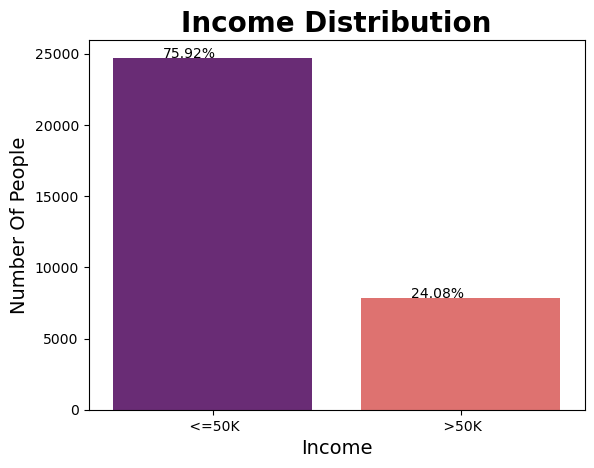

In [14]:
ax = sns.countplot(x='Income', data=df, palette='magma')
plt.title('Income Distribution', fontdict={'fontweight':'bold', 'fontsize':20})
plt.ylabel("Number Of People", fontsize=14)
plt.xlabel('Income', fontsize=14)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()/len(df)*100), (p.get_x()+0.2, p.get_height()+5))

plt.show()

Text(0, 0.5, 'Number Of People')

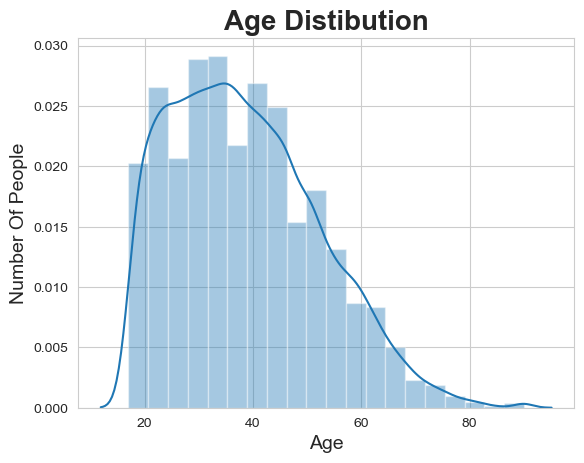

In [15]:
sns.set_style('whitegrid')
sns.distplot(df['Age'],bins=20)
plt.title('Age Distibution',fontdict={'fontsize':20,'fontweight':'bold'})
plt.xlabel('Age',fontsize=14)
plt.ylabel('Number Of People',fontsize=14)

Text(0.5, 0, 'Count')

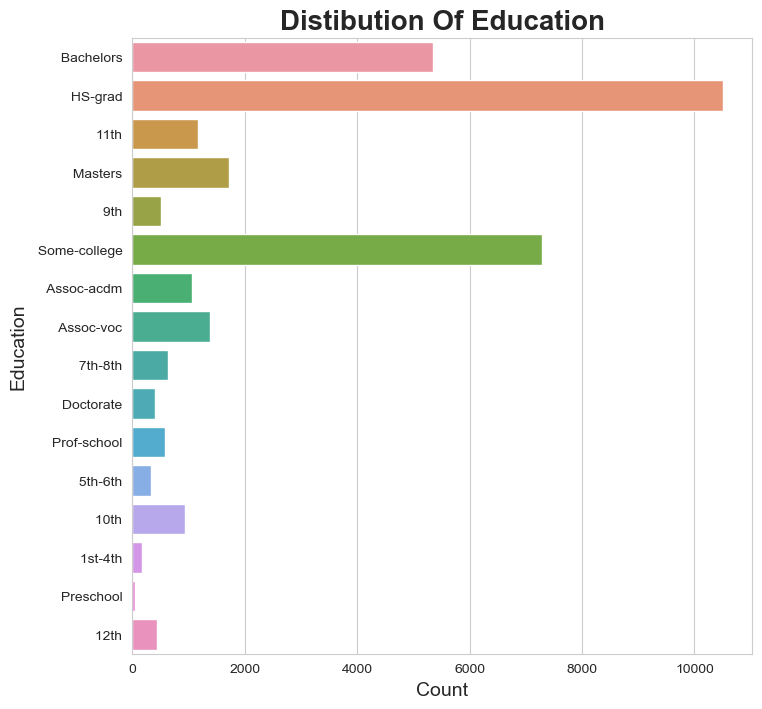

In [16]:
plt.figure(figsize=(8,8))
sns.countplot(y=df['Education'],data=df)
plt.title('Distibution Of Education',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel('Education',fontsize=14)
plt.xlabel('Count',fontsize=14)

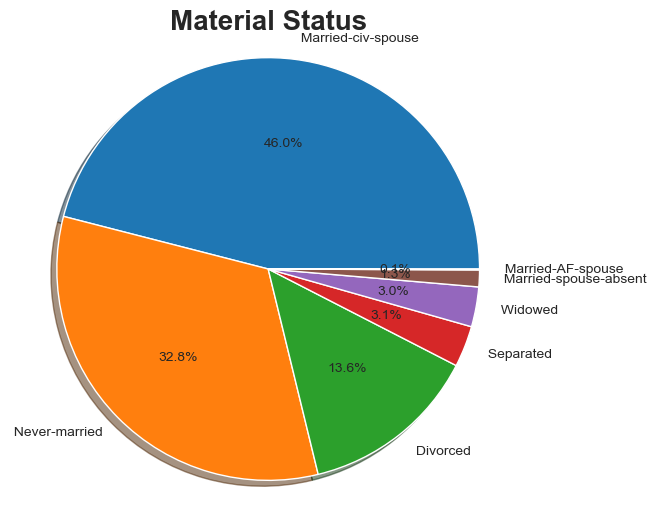

In [17]:
plt.figure(figsize=(6,6))
x=df['Marital_status'].value_counts()
plt.pie(x,labels=x.index,shadow=True, autopct='%1.1f%%')
plt.title('Material Status',fontdict={'fontweight':'bold','fontsize':20})
plt.axis('equal')
plt.show()

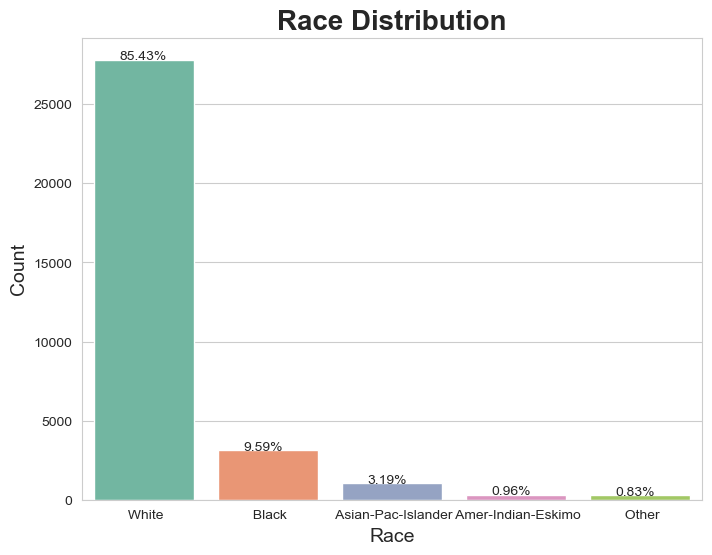

In [18]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Race', data=df, palette='Set2')
plt.title('Race Distribution', fontdict={'fontweight': 'bold', 'fontsize': 20})
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height() / len(df) * 100), (p.get_x() + 0.2, p.get_height() + 5))
plt.xlabel('Race', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

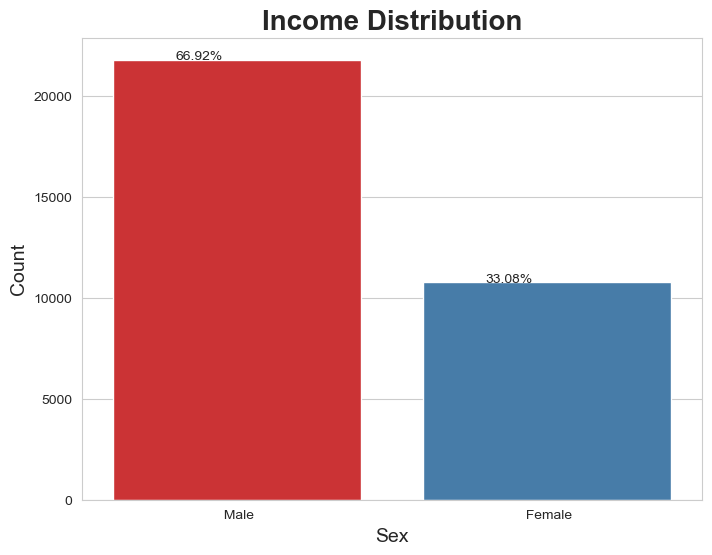

In [19]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sex', data=df, palette='Set1')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height() / len(df) * 100), (p.get_x() + 0.2, p.get_height() + 5))
plt.title('Income Distribution', fontdict={'fontweight': 'bold', 'fontsize': 20})
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Text(0, 0.5, 'Count')

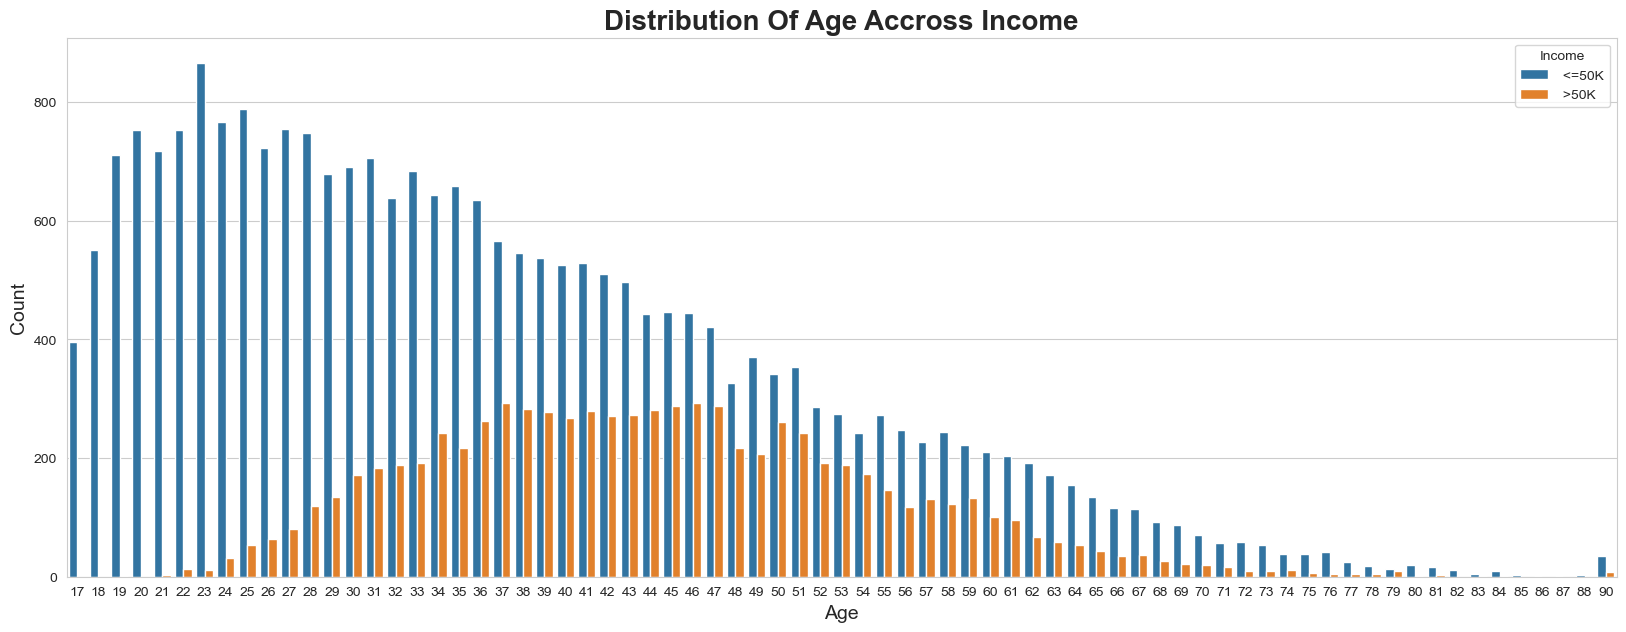

In [20]:
plt.figure(figsize=(20,7))
sns.countplot(x=df['Age'],data=df,hue='Income')
plt.title('Distribution Of Age Accross Income',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Age',fontsize=14)
plt.ylabel('Count',fontsize=14)

As income increases, the number of individuals earning below 50,000 decreases, while the number of individuals earning above 50,000 increases.

Text(0, 0.5, 'WorkClass')

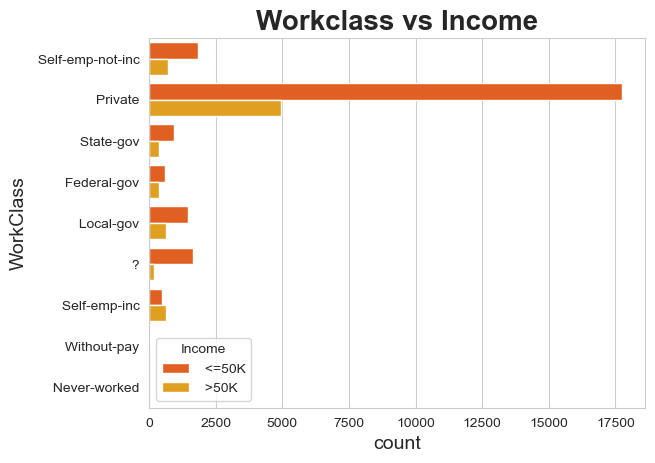

In [21]:
sns.countplot(y=df['Workclass'],data=df,hue='Income',palette='autumn')
plt.title('Workclass vs Income',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('count',fontsize=14)
plt.ylabel('WorkClass',fontsize=14)

The majority of people work in the private sector, while only a few work in the federal government.

Here, we observe some unknown values (?), which we will replace with the most frequent values later on.

Income         <=50K   >50K
Capital_loss               
0              23973   7068
155                1      0
213                4      0
323                3      0
419                3      0
...              ...    ...
3004               0      2
3683               1      1
3770               2      0
3900               2      0
4356               3      0

[92 rows x 2 columns]


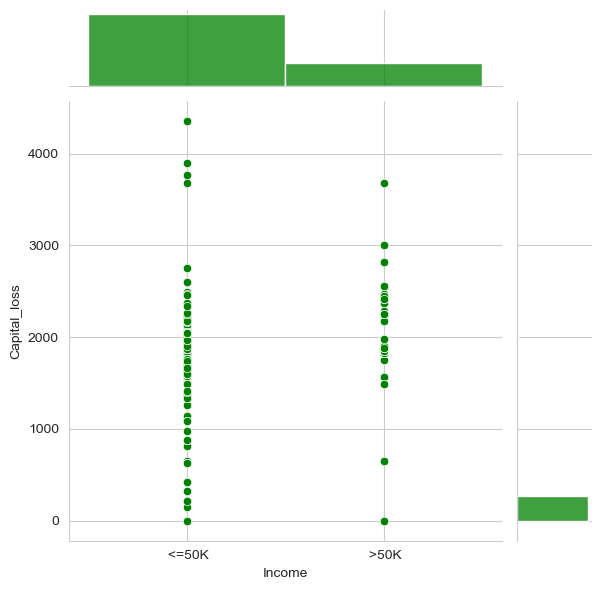

In [23]:
print(pd.crosstab(df['Capital_loss'],df['Income']))
sns.jointplot(y=df['Capital_loss'],x=df['Income'],data=df,color='green')

Income         <=50K   >50K
Capital_gain               
0              23685   6164
114                6      0
401                2      0
594               34      0
914                8      0
...              ...    ...
25236              0     11
27828              0     34
34095              5      0
41310              2      0
99999              0    159

[119 rows x 2 columns]


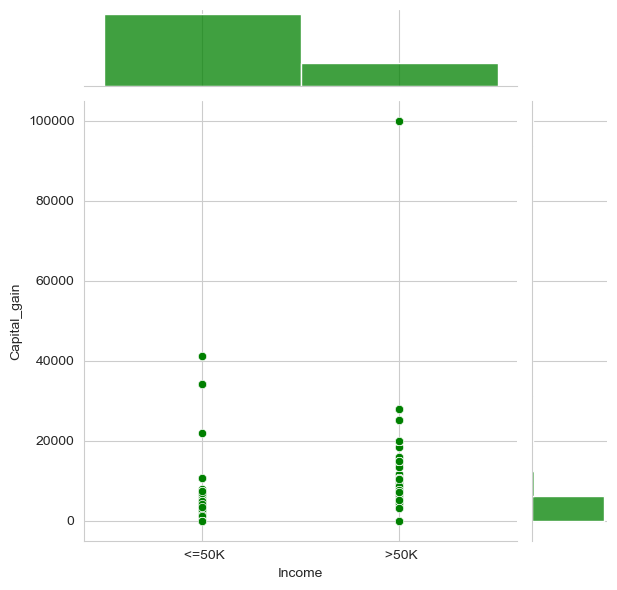

In [24]:
print(pd.crosstab(df['Capital_gain'],df['Income']))
sns.jointplot(y=df['Capital_gain'],x=df['Income'],data=df,color='green')

From the two charts above, we can infer that individuals with incomes greater than 50,000 tend to have lower capital losses compared to those earning less than 50,000. Therefore, we can conclude that if capital gains were to decrease, their income would increase.

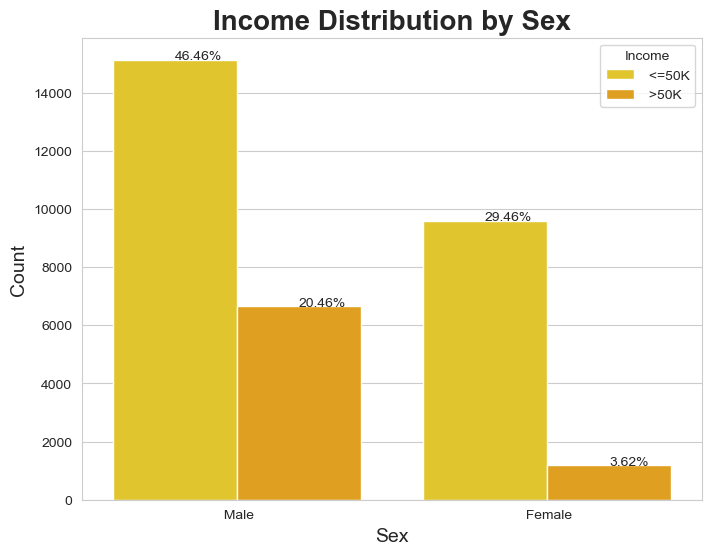

In [25]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sex', data=df, palette='Wistia', hue='Income')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height() / len(df) * 100), (p.get_x() + 0.2, p.get_height() + 5))
plt.title('Income Distribution by Sex', fontdict={'fontweight': 'bold', 'fontsize': 20})
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In the dataset, there are more male applicants than females. The ratio of income above and below 50,000 varies among females.

There are fewer females with incomes exceeding 50,000.

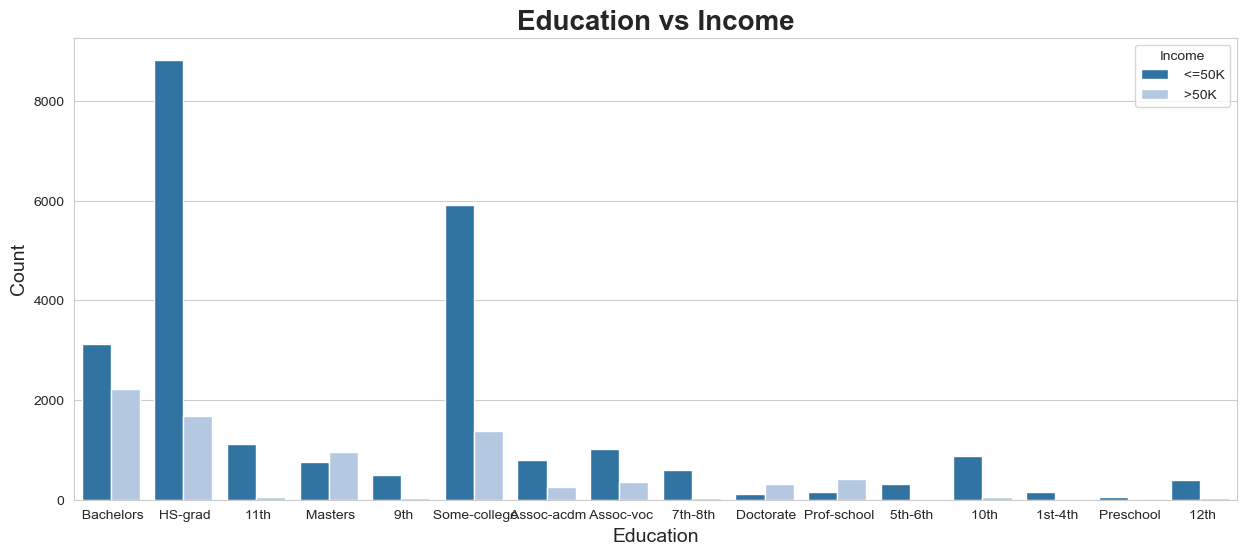

In [26]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Education', hue='Income', data=df, palette='tab20')
plt.title('Education vs Income', fontdict={'fontweight': 'bold', 'fontsize': 20})
plt.xlabel('Education', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

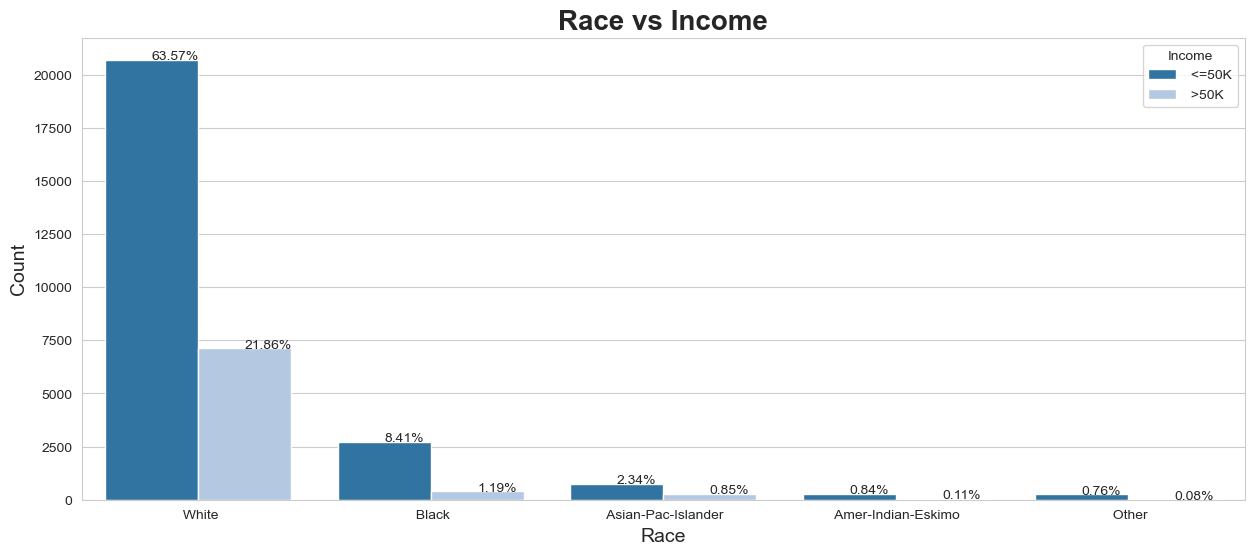

In [27]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='Race', hue='Income', data=df, palette='tab20')
plt.title('Race vs Income', fontdict={'fontweight': 'bold', 'fontsize': 20})
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height() / len(df) * 100), (p.get_x() + 0.2, p.get_height() + 5))
plt.xlabel('Race', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

From the above visualization, we can observe that the ratio between individuals earning more than 50k and those earning less than 50k is higher in the White and Asian-Pacific Islander categories compared to others.

Text(0.5, 0, 'Count')

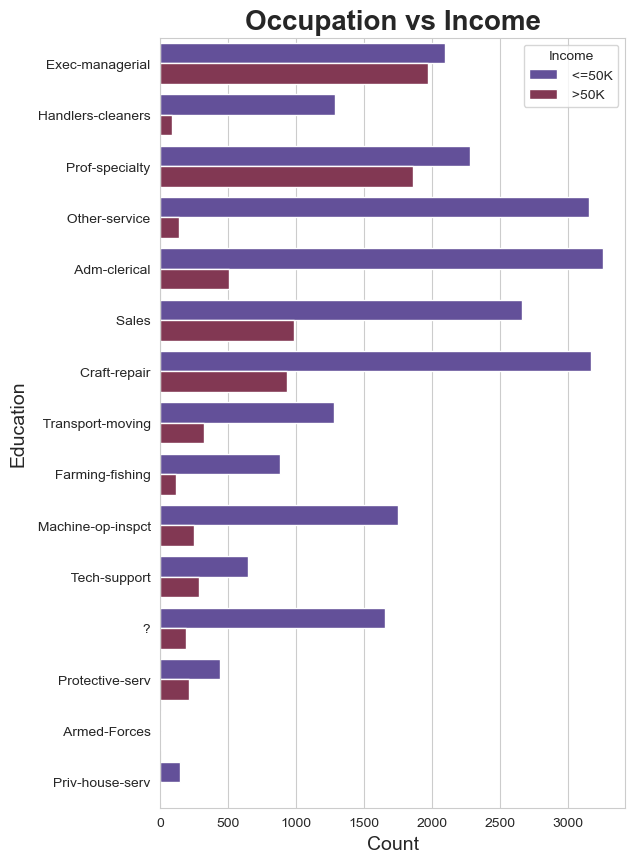

In [28]:
plt.figure(figsize=(6,10))
ax=sns.countplot(y=df['Occupation'],hue='Income',data=df,palette='twilight')
plt.title('Occupation vs Income',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel('Education',fontsize=14)
plt.xlabel('Count',fontsize=14)

The ratio of individuals with incomes exceeding 50k is higher in the Ex-Managerial and Professional-Specialty occupations.

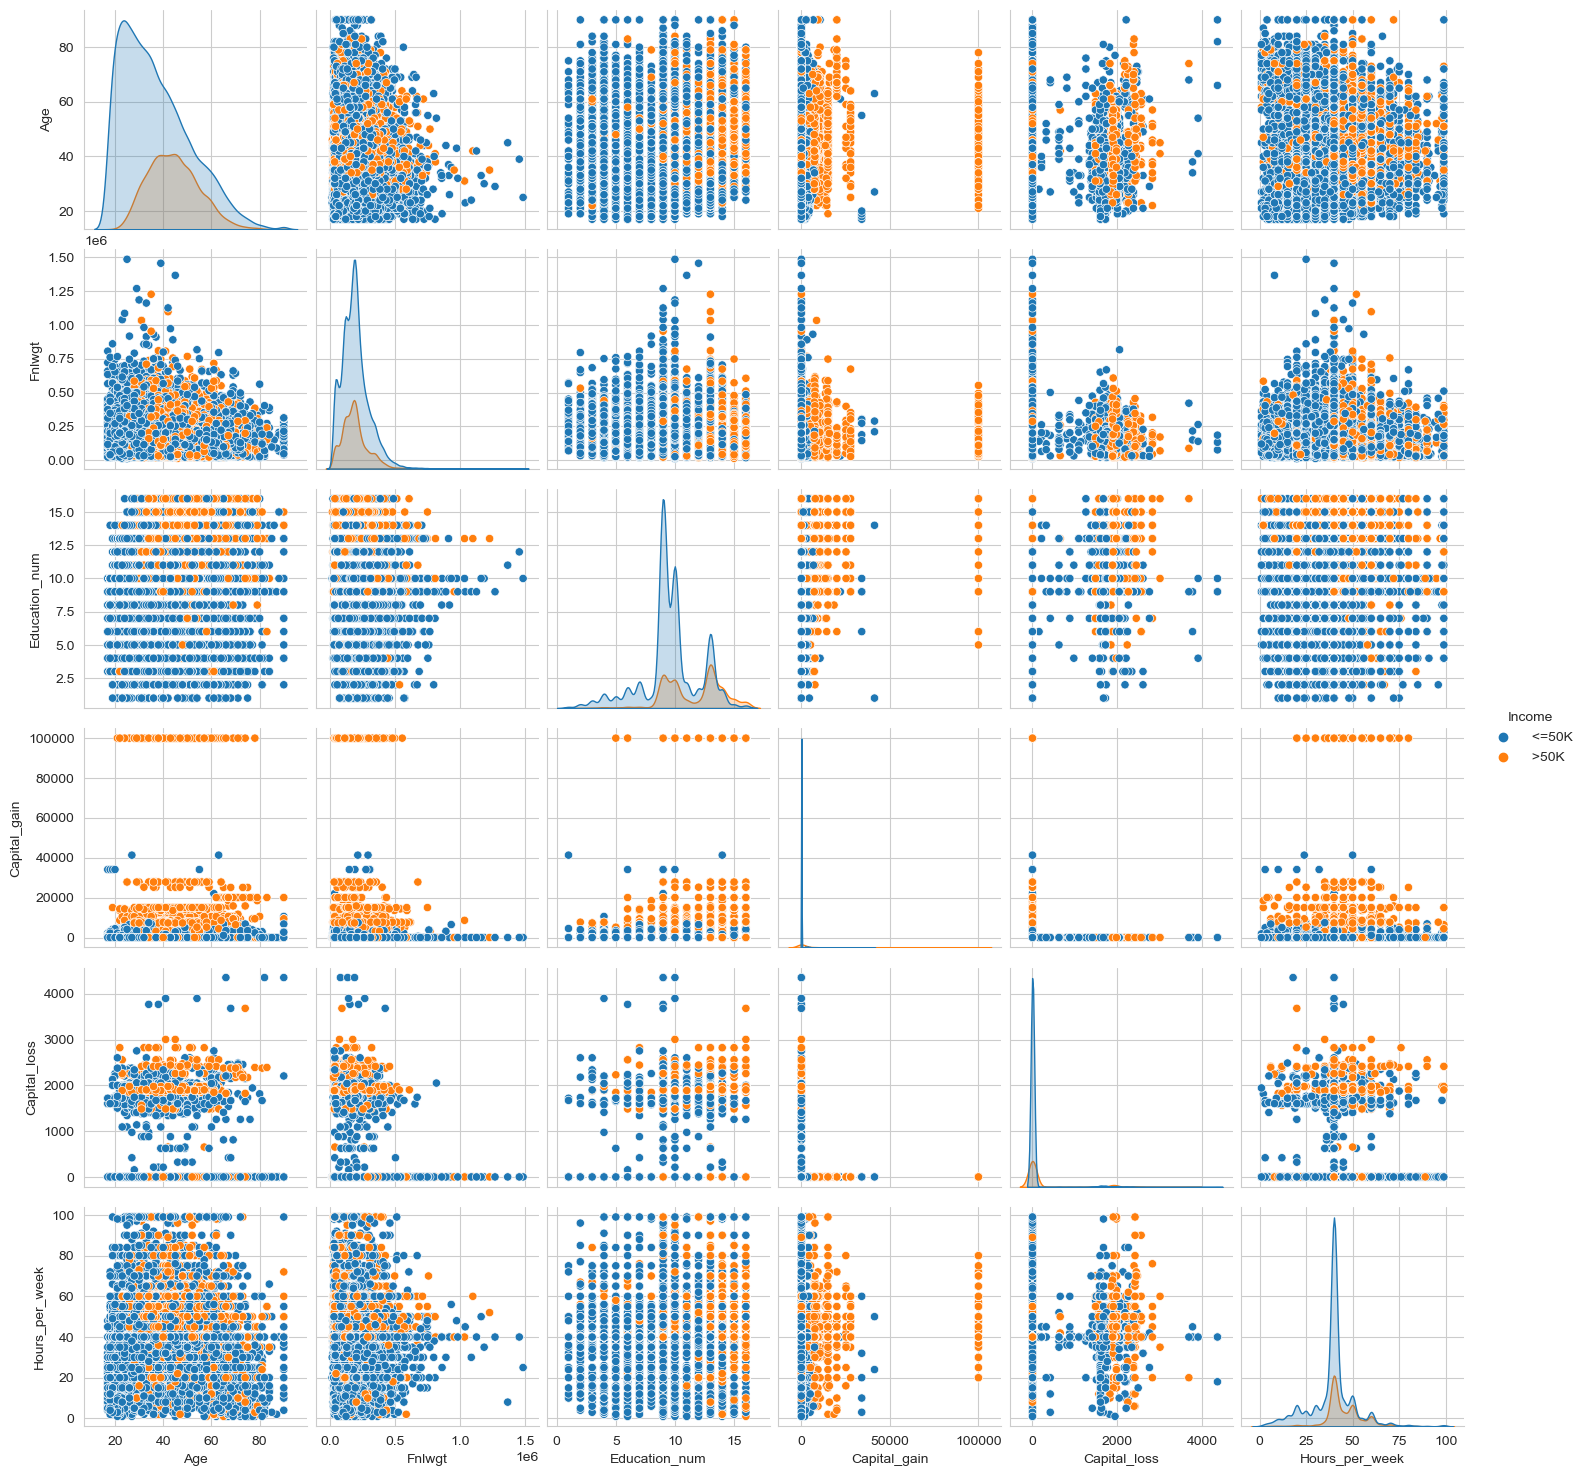

In [29]:
sns.pairplot(df, hue = 'Income')

### Data Preprocessing

We've a mislabeled category "?" in our column. We can replace it with the mode(most occurred).

In [30]:
#Replacing missing values with most occured value in the column
df['Workclass']=df['Workclass'].replace(" ?",np.nan)
df['Occupation']=df['Occupation'].replace(" ?",np.nan)
df['Native_country']=df['Native_country'].replace(" ?",np.nan)

In [31]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [32]:
nan=['Workclass','Occupation','Native_country']

In [33]:
for i in nan:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [34]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

### Label Encoder

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
lb=LabelEncoder()

for i in categorical_features:
    df[i]=lb.fit_transform(df[i])

In [37]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


### Statistical Overview

In [38]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.094349,1.897818e+05,10.298249,10.080590,2.611794,6.138943,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.417107,0.240817
std,13.640642,1.107094,1.055498e+05,3.870317,2.572709,1.506225,3.972623,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.056133,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


Text(0.5, 1.0, 'Co-Relation')

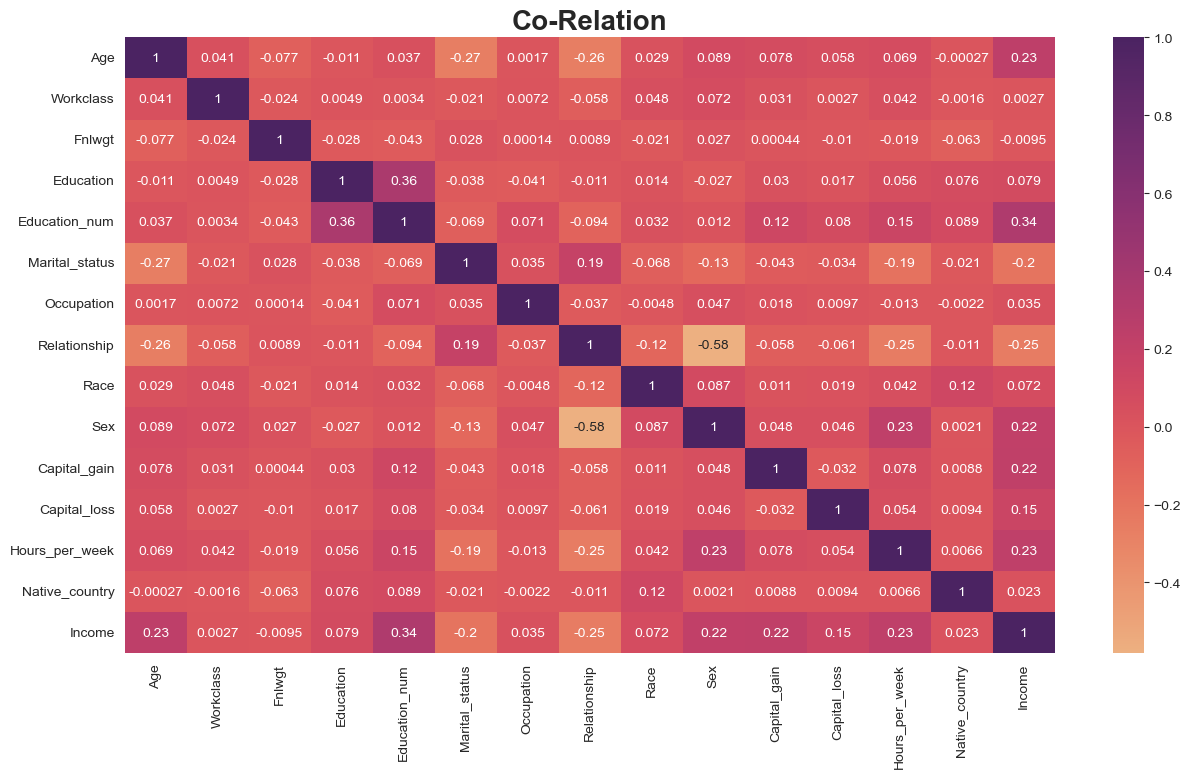

In [39]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df.corr(),annot=True,cmap='flare')
plt.title('Co-Relation',fontdict={'fontweight':'bold','fontsize':20})

Education Number and Age exhibit a strong positive correlation with Income.

Marital Status and Relationship exhibit a negative correlation with Income.

### Data Cleaning

Removing Outliers

In [40]:
from scipy.stats import zscore

In [41]:
z=abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [42]:
df_new.shape

(27770, 15)

In [43]:
print('Loss Of Data=',(32560-27770)/32536*100)

Loss Of Data= 14.722153921809689


The data loss is significant, so we will refrain from dropping outliers.

Relationship and Marital Status exhibit a negative correlation with Income.

Age and Hours Per Week have the strongest correlation with income.

In [44]:
x=df.drop('Income',axis=1)
y=df['Income']

### Feature Selection

In [45]:
from sklearn.ensemble import ExtraTreesClassifier

In [46]:
et=ExtraTreesClassifier()
et.fit(x,y)

ExtraTreesClassifier()

In [47]:
fi=et.feature_importances_
for index, val in enumerate(fi):
    print(index, round((val * 100), 2))

0 15.77
1 4.11
2 16.69
3 3.68
4 8.91
5 7.62
6 7.43
7 8.87
8 1.47
9 2.86
10 8.74
11 2.85
12 9.46
13 1.53


We will drop the columns with lower scores from the above table.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int64
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int64
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int64
 6   Occupation      32560 non-null  int64
 7   Relationship    32560 non-null  int64
 8   Race            32560 non-null  int64
 9   Sex             32560 non-null  int64
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int64
 14  Income          32560 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [49]:
x=df.drop(['Workclass','Education','Race','Sex','Capital_loss','Native_country','Income'],axis=1)
y=df['Income']

In [50]:
y.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [51]:
x

,Age,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Capital_gain,Hours_per_week
0,50,83311,13,2,3,0,0,13
1,38,215646,9,0,5,1,0,40
2,53,234721,7,2,5,0,0,40
3,28,338409,13,2,9,5,0,40
4,37,284582,14,2,3,5,0,40
...,...,...,...,...,...,...,...,...
32555,27,257302,12,2,12,5,0,38
32556,40,154374,9,2,6,0,0,40
32557,58,151910,9,6,0,4,0,40
32558,22,201490,9,4,0,3,0,20


In [52]:
x.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Capital_gain      11.953690
Hours_per_week     0.227636
dtype: float64

In [53]:
from sklearn.preprocessing import power_transform
#Remove skewness
x1=power_transform(x,method='yeo-johnson')
x1=pd.DataFrame(x1)

In [54]:
x1.skew()

0   -0.013897
1    0.016914
2    0.023885
3   -0.114201
4   -0.237163
5    0.122917
6    3.016951
7    0.229556
dtype: float64

In [55]:
x=x1

### Balancing Target Variable Class using OverSampling method SMOTE.

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [59]:
trainy.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

In [60]:
from sklearn.model_selection  import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [61]:
lg=LogisticRegression()

### Random State Selection

In [62]:
for i in range(1,50):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=0.20,random_state=i)
    lg.fit(x_train,y_train)
    pred_test=lg.predict(x_test)
    pred_train=lg.predict(x_train)
    if round(accuracy_score(y_test,pred_test)*100,1)==round(accuracy_score(y_train,pred_train)*100,1):
        print('Random state',i,'score is well')
        print('test score',accuracy_score(y_test,pred_test)*100)
        print('train score',accuracy_score(y_train,pred_train)*100)

Random state 11 score is well
test score 77.22491909385113
train score 77.24905183312262
Random state 14 score is well
test score 77.29571197411003
train score 77.28697850821744
Random state 18 score is well
test score 77.30582524271846
train score 77.31226295828066
Random state 29 score is well
test score 77.29571197411003
train score 77.28697850821744
Random state 46 score is well
test score 77.26537216828478
train score 77.33501896333755


In [63]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=0.20,random_state=42)

In [64]:
x_train.shape

(39550, 8)

In [65]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [66]:
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gb=GaussianNB()

In [68]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Accuracy Score',accuracy_score(y_test,pred)*100)
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred)*100)

In [69]:
fun(lg)

Accuracy Score 77.42718446601941
Confusion Matrix
 [[3725 1218]
 [1014 3931]]
Classification Report
               precision    recall  f1-score   support

           0       0.79      0.75      0.77      4943
           1       0.76      0.79      0.78      4945

    accuracy                           0.77      9888
   macro avg       0.77      0.77      0.77      9888
weighted avg       0.77      0.77      0.77      9888

F1 score 77.88785417079454


In [70]:
fun(knn)

Accuracy Score 84.92111650485437
Confusion Matrix
 [[3801 1142]
 [ 349 4596]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.77      0.84      4943
           1       0.80      0.93      0.86      4945

    accuracy                           0.85      9888
   macro avg       0.86      0.85      0.85      9888
weighted avg       0.86      0.85      0.85      9888

F1 score 86.04324627913508


In [71]:
fun(dtc)

Accuracy Score 85.34587378640776
Confusion Matrix
 [[4182  761]
 [ 688 4257]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      4943
           1       0.85      0.86      0.85      4945

    accuracy                           0.85      9888
   macro avg       0.85      0.85      0.85      9888
weighted avg       0.85      0.85      0.85      9888

F1 score 85.45618789521228


In [72]:
fun(svc)

Accuracy Score 82.10962783171522
Confusion Matrix
 [[3703 1240]
 [ 529 4416]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.75      0.81      4943
           1       0.78      0.89      0.83      4945

    accuracy                           0.82      9888
   macro avg       0.83      0.82      0.82      9888
weighted avg       0.83      0.82      0.82      9888

F1 score 83.31289500990474


### Ensemble Method

In [73]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [74]:
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
gd=GradientBoostingClassifier()

In [75]:
fun(rfc)

Accuracy Score 89.01699029126213
Confusion Matrix
 [[4324  619]
 [ 467 4478]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      4943
           1       0.88      0.91      0.89      4945

    accuracy                           0.89      9888
   macro avg       0.89      0.89      0.89      9888
weighted avg       0.89      0.89      0.89      9888

F1 score 89.18542123083051


In [76]:
fun(ad)

Accuracy Score 84.72896440129449
Confusion Matrix
 [[4019  924]
 [ 586 4359]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      4943
           1       0.83      0.88      0.85      4945

    accuracy                           0.85      9888
   macro avg       0.85      0.85      0.85      9888
weighted avg       0.85      0.85      0.85      9888

F1 score 85.23660539694954


In [77]:
fun(gd)

Accuracy Score 86.33697411003236
Confusion Matrix
 [[4091  852]
 [ 499 4446]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      4943
           1       0.84      0.90      0.87      4945

    accuracy                           0.86      9888
   macro avg       0.87      0.86      0.86      9888
weighted avg       0.87      0.86      0.86      9888

F1 score 86.81050473494093


### Hyperparameter Tuning of Best Model

In [78]:
from sklearn.model_selection import GridSearchCV

#### Decision Tree Classifier

In [79]:
p3={'criterion':['ginny','entropy'],'splitter':['best','random'],'max_features':['auto','sqrt','log2'],'max_depth':[1,2,3,4,5]}
gd=GridSearchCV(dtc,p3)
gd.fit(x,y)
print(gd.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'splitter': 'best'}


In [80]:
dtc1=DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='log2',splitter='best')

In [81]:
fun(dtc1)

Accuracy Score 78.17556634304206
Confusion Matrix
 [[3081 1862]
 [ 296 4649]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.62      0.74      4943
           1       0.71      0.94      0.81      4945

    accuracy                           0.78      9888
   macro avg       0.81      0.78      0.78      9888
weighted avg       0.81      0.78      0.78      9888

F1 score 81.16270949720669


#### Cross Validation

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
for i in range(2,16):
    score=cross_val_score(dtc1,trainx,trainy,cv=i)
    print('AT CV=',i,score.mean())

AT CV= 2 0.792285286621627
AT CV= 3 0.7970591395521338
AT CV= 4 0.7999317168207544
AT CV= 5 0.8013471974411172
AT CV= 6 0.8009022523313423
AT CV= 7 0.797018463075353
AT CV= 8 0.7988998911125531
AT CV= 9 0.7938025818329976
AT CV= 10 0.7989401916475654
AT CV= 11 0.7935600834595564
AT CV= 12 0.794955357248083
AT CV= 13 0.7927507018010888
AT CV= 14 0.7950163918983046
AT CV= 15 0.7963105998104414


### Plotting AUC-ROC Curve

In [84]:
from sklearn.metrics import roc_curve

In [85]:
y_pred_prob=rfc.predict_proba(x_test)[:,1]

In [86]:
fpr,tpr,thersholds=roc_curve(y_test,y_pred_prob)
print('ROC Score',roc_auc_score(y_test,rfc.predict(x_test)))

ROC Score 0.890166789161865


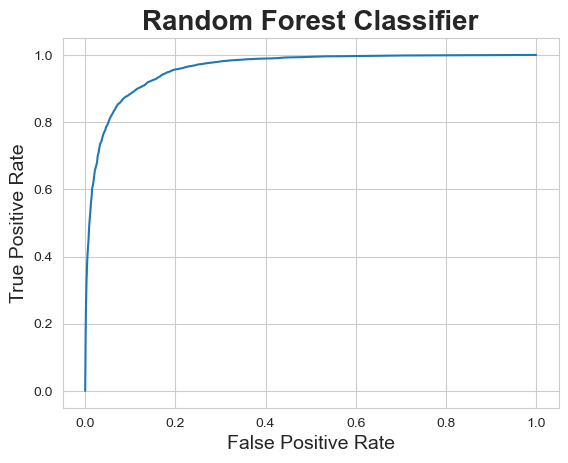

In [87]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('Random Forest Classifier',fontdict={'fontweight':'bold','fontsize':20})
plt.show()

### Saving Final Model

In [93]:
import pickle
filename='Census_Inc_Prediction.pkl'
pickle.dump(rfc,open(filename,'wb'))

### Loading Our Model for Final Predictions

       Actual  Predict
32168       0        0
199         0        0
16026       0        0
10791       1        1
33656       1        1
...       ...      ...
30612       0        0
33730       1        1
4546        0        0
26559       1        0
32895       1        1

[9888 rows x 2 columns]


Text(0.5, 1.0, 'RIDGE Regressor')

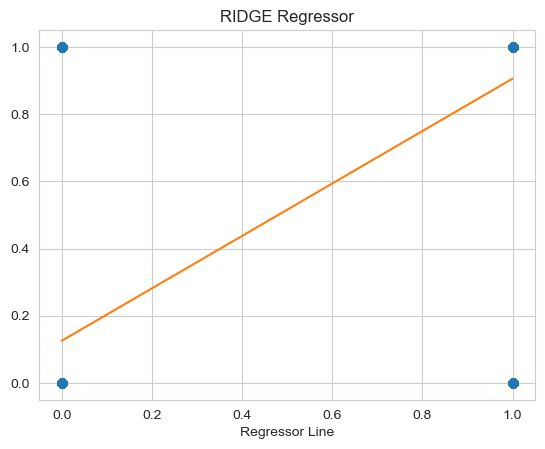

In [94]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=rfc.predict(x_test)

print(res)
x=np.array(y_test)
y=np.array(rfc.predict(x_test))

plt.plot(x,y,'o')

m,b=np.polyfit(x,y,1)

plt.plot(x,m*x+b)
plt.xlabel('Regressor Line')
plt.title('RIDGE Regressor')